# 3.1 概率模型的利用
<font size=4>

1. 标准差(STE, Standard error)$\sigma$指数据点的实际观测值在预测值的$\pm \sigma$附近波动  

2. 数据科学的本质就是在**假设/验证**间不断进行迭代的科学方法。首先以简单的假设为基础，通过解释清楚“为何这个假设不成立”，就可以发掘出隐藏在数据背后的更本质的事实。  

![数据产生的概率设置](./data/learn_WML_chapter_3_数据产生的概率设置.jpg "数据产生的概率设置")  

3. 最优化推断模型的定义  

![最优化推断模型](./data/learn_WML_chapter_3_最优化推断模型.jpg "最优化推断模型")  

4. 最大似然函数的数学求解原理  

![最大似然函数的数学求解原理](./data/learn_WML_chapter_3_最大似然函数的数学求解原理.jpg "最大似然函数的数学求解原理")

</font>

## 最优推断法（极大似然函数优化）的Python实现

training set data sample:
          x         y
0  0.000000 -0.035361
1  0.111111  0.968105
2  0.222222  1.381417
3  0.333333  0.967388
4  0.444444  0.614811
testing set data sample:
          x         y
0  0.000000  0.236384
1  0.111111  0.668369
2  0.222222  1.113799
3  0.333333  0.952589
4  0.444444  0.443107


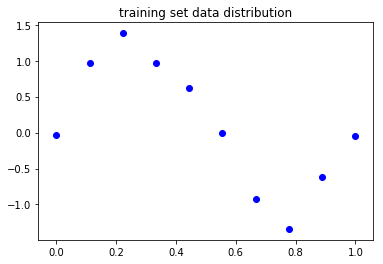

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def create_dataset(num):
    x=np.array(range(num))/float(num-1)
    y=np.sin(2*np.pi*x)+np.random.normal(scale=0.3,size=num)
    return pd.DataFrame(data=np.transpose(np.array([x,y])),columns=['x','y'],dtype=np.float)

# create original dataset

N=10
M=[0,1,3,9]
# M=list(range(10))
train_set=create_dataset(N)
print("training set data sample:")
print(train_set.head())
test_set=create_dataset(N)
print("testing set data sample:")
print(test_set.head())

# scatter of original data
plt.scatter(train_set.x,train_set.y,marker="o",color="blue")
plt.title("training set data distribution")
plt.show()

In [4]:
# 最小二乘法
def resolve(dataset,m):
    # 最小二乘法求解核心过程
    phi=pd.DataFrame()
    for i in range(m+1):
        p=dataset.x**i
        p.name="x**{}".format(i)
        phi=pd.concat([phi,p],axis=1)
    tmp=np.linalg.inv(np.dot(phi.T,phi))
    t=dataset.y
    ws=np.dot(np.dot(tmp,phi.T),t)
    
    def f(x):
        y=0
        for i,w in enumerate(ws):
            y+=w*(x**i)
        return y
    
    sigma2=0.0
    for index,line in dataset.iterrows():
        sigma2+=(f(line.x)-line.y)**2
    sigma2/=len(dataset)
    
    # 返回一个函数的写法，类似于C++中的函数指针
    return (f,np.sqrt(sigma2))

# 均方误差RMS(Root mean square error)
def rms(dataset,f):
    err=0.0
    for index,line in dataset.iterrows():
        x,y=line.x,line.y
        err+=0.5*(y-f(x))**2
    return np.sqrt(2*err/len(dataset))

# 计算对数似然函数
def log_likelihood(dataset,f):
    dev=0.0
    n=float(len(dataset))
    for index,line in dataset.iterrows():
        x,y=line.x,line.y
        dev+=(y-f(x))**2
    err=dev*0.5
    beta=n/dev
    lp=-beta*err+0.5*n*np.log(0.5*beta/np.pi)
    return lp
    
def show_result(subplot,train_set,m):
    f,sigma=resolve(train_set,m)
    subplot.set_xlim(-0.05,1.05)
    subplot.set_ylim(-1.5,1,5)
    subplot.set_title("M={}".format(m),fontsize=10)
    # 真实数据散点图
    subplot.scatter(train_set.x,train_set.y,marker="o",color="blue",label=None)
    
    # 原始的数据生成函数曲线
    linex=np.linspace(0,1,101)
    liney=np.sin(2*np.pi*linex)
    subplot.plot(linex,liney,color="green",linestyle="--")
    
    # 多项式逼近拟合曲线
    linex=np.linspace(0,1,101)
    liney=f(linex)
    subplot.plot(linex,liney,color="red",label="Sigma={:.2f}".format(sigma))
    subplot.plot(linex,liney+sigma,color="red",linestyle="--")
    subplot.plot(linex,liney-sigma,color="red",linestyle="--")
    subplot.legend(loc=1,fontsize=10)

def show_loglikelilood_trend(train_set,test_set,n):
    df=pd.DataFrame()
    train_mlh=[]
    test_mlh=[]
    for m in range(n):
        f,sigma=resolve(train_set,m)
        train_mlh.append(log_likelihood(train_set,f))
        test_mlh.append(log_likelihood(test_set,f))
    df=pd.concat([df,pd.DataFrame(train_mlh,columns=["Training set"]),pd.DataFrame(test_mlh,columns=["Testing set"])],axis=1)
    df.plot(title="Log likelilodd for N={}".format(N),style=["-","--"],grid=True)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


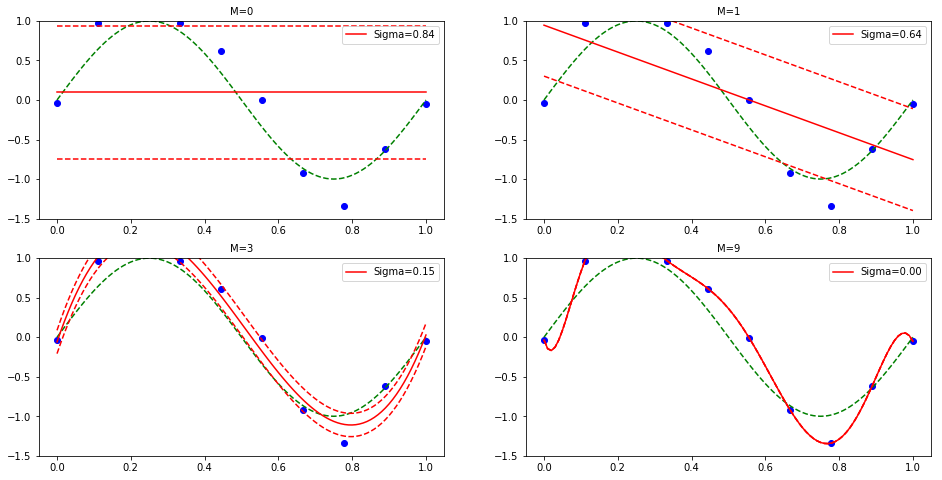

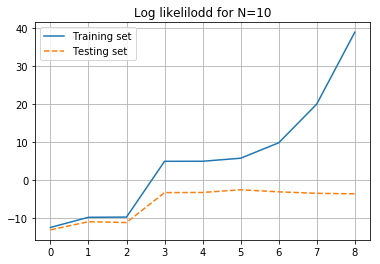

In [6]:
# 不同M（模型复杂度）下对数似然函数最大化为优化目标的多项式函数的拟合效果
fig=plt.figure(figsize=(16,8))
for i,m in enumerate(M):
    subplot=fig.add_subplot(2,2,i+1)
    show_result(subplot,train_set,m)
fig.show()
# 对数似然函数在不同M值（range(10)）下的变化趋势
show_loglikelilood_trend(train_set,test_set,n=9)

training set data sample:
          x         y
0  0.000000  0.190356
1  0.010101 -0.153364
2  0.020202  0.308889
3  0.030303 -0.345639
4  0.040404  0.185977
testing set data sample:
          x         y
0  0.000000  0.304348
1  0.010101 -0.206667
2  0.020202  0.023045
3  0.030303 -0.021659
4  0.040404  0.669897


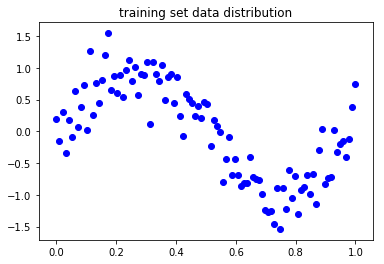

In [7]:
# 增大数据量再观察M值对拟合效果的影响，说明增大数据量可以有效防止过拟合，有时是数据量远大于参数个数，达到10倍以上时
N=100
train_set=create_dataset(N)
print("training set data sample:")
print(train_set.head())
test_set=create_dataset(N)
print("testing set data sample:")
print(test_set.head())

# scatter of original data
plt.scatter(train_set.x,train_set.y,marker="o",color="blue")
plt.title("training set data distribution")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


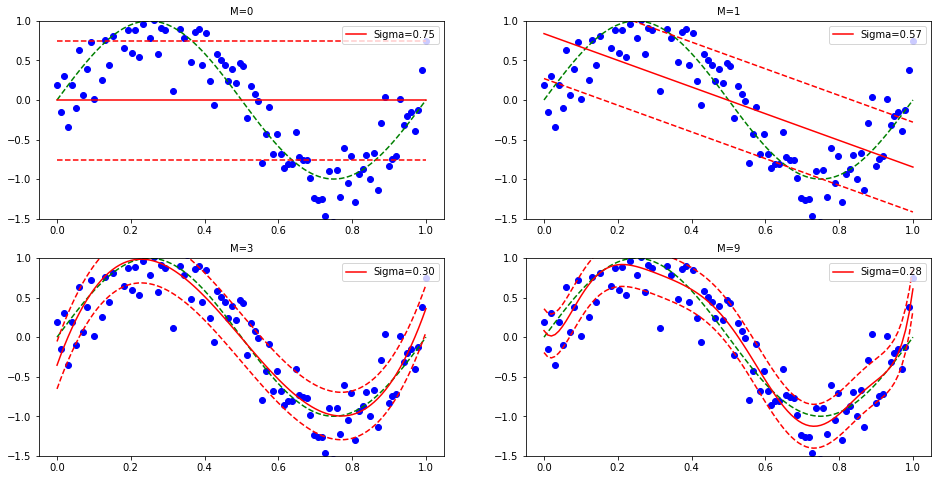

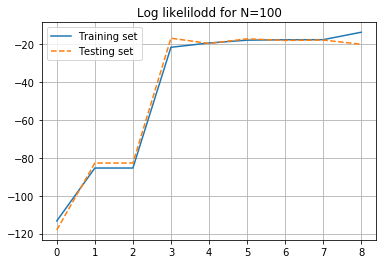

In [9]:
'''
在N=100的数据量下再次观察实验效果
可以看到 M=3 以后拟合曲线基本不再随着M变化而变化，形成了稳定的良好拟合效果
'''

# 不同M（模型复杂度）下对数似然函数最大化为优化目标的多项式函数的拟合效果
fig=plt.figure(figsize=(16,8))
for i,m in enumerate(M):
    subplot=fig.add_subplot(2,2,i+1)
    show_result(subplot,train_set,m)
fig.show()
# 对数似然函数在不同M值（range(10)）下的变化趋势
show_loglikelilood_trend(train_set,test_set,n=9)

# 3.2 使用简化实例的解释说明

## 同一观测点数据群正态分布的极大似然函数优化数学求解
![同一观测点数据群正态分布](./data/learn_WML_chapter_3_同一观测点数据群正态分布.jpg "同一观测点数据群正态分布")

In [27]:
# 代码实现
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.stats import norm

def show_mle(subplot,datapoints):
    # create data points 
    ds=np.random.normal(loc=0,scale=1,size=datapoints)
    # compute mean(mu) and standard error(sigam)
    mu=np.mean(ds)
    sigma=np.std(ds)
    subplot.set_title("N={}".format(datapoints))
    
    # plot figure
    linex=np.arange(-10,10.1,0.1)
    orig=norm(loc=0,scale=1)
    subplot.plot(linex,orig.pdf(linex),color="green",linestyle="--",label="NormaL Distribution")
    
    # fitting curve
    est=norm(loc=mu,scale=sigma)
    subplot.plot(linex,est.pdf(linex),color="red",label="Sigma={:.2f}".format(sigma))
    subplot.legend(loc=1)
    
    # scatter
    subplot.scatter(ds,orig.pdf(ds),color="blue",marker="o")
    subplot.set_xlim(-4,4)
    subplot.set_ylim(0)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


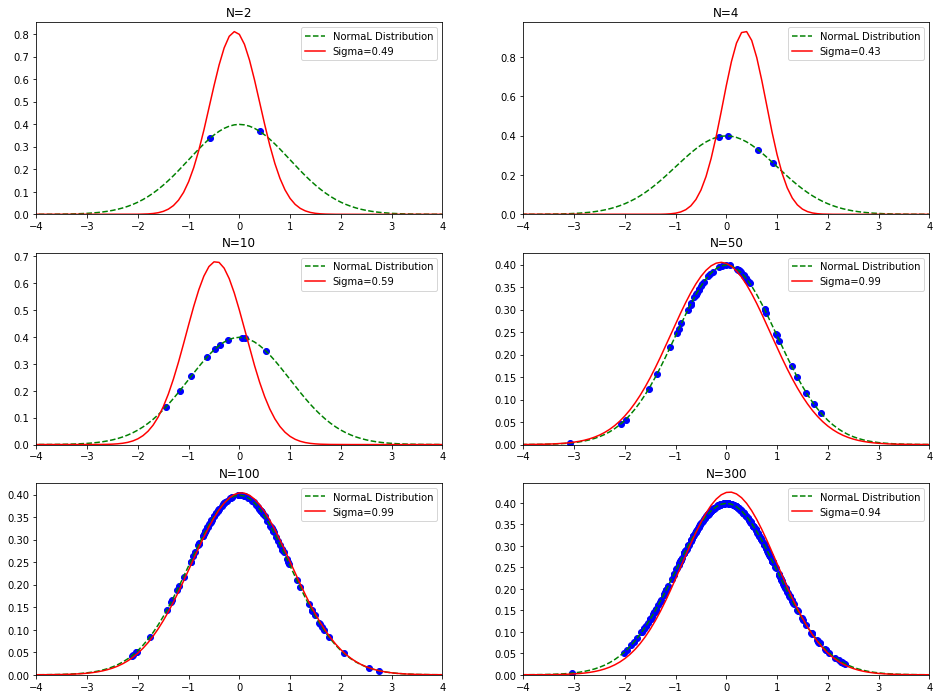

In [28]:
# 观察不同数据量(N值)下单数据点的极大似然函数优化拟合效果
fig=plt.figure(figsize=(16,12))
for c,datapoints in enumerate([2,4,10,50,100,300]):
    subplot=fig.add_subplot(3,2,c+1)
    show_mle(subplot,datapoints)
fig.show()

# 3.3 样本均值与样本方差的一致性与无偏性

### [\*]. 当基于某种原理得出计算值的方法时，我们将该方法称为“计算量”
### [1]. 推断量随着样本数据个数的增多而靠近总体参数的现象称为“一致性”,通常将具有一致性的推断量称为“一致推断量”
#### 一致性强调数据量的增大导致推断值接近准确值（总体参数）
### [2]. 反复进行推断过程时平均推断值逐渐接近总体参数的推断量叫做“无偏推断量”，这种性质叫做无偏性。
#### [2.1] 无偏性强调按照同一数据量N下反复迭代推断得到的推断值逐渐接近准确值（总体参数）
#### [2.2] 无偏性就是反复计算大量推断值的均值

## 一致性与无偏性的数学定义
![一致性与无偏性的数学定义](./data/learn_WML_chapter_3_一致性与无偏性的数学定义.jpg "一致性与无偏性的数学定义")

## 通过图像观察样本均值、样本方差、无偏方差

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [66]:
raw_linex=[] #随机数
raw_mu=[] #样本均值
raw_s2=[] #样本方差
raw_u2=[] #样本无偏方差

mean_linex=[]
mean_mu=[]
mean_s2=[]
mean_u2=[]

## a. 重复操作N=2000次“生成N个数据计算推断值”过程后，求出这两千个推断值的均值
## b. 从2000个推断值中抽出40个（每隔50个取一个）构成图像
## c. 用图像表示平均推断值

In [67]:
# a. 重复操作N=2000次“生成N个数据计算推断值”过程后，求出这两千个推断值的均值
for n in np.arange(2,51):
    for c in range(2000):
        ds=np.random.normal(loc=0,scale=1,size=n)
        raw_mu.append(np.mean(ds))
        raw_s2.append(np.var(ds))
        raw_u2.append(np.var(ds)*n/(n-1))
        raw_linex.append(n)
    mean_mu.append(np.mean(raw_mu))
    mean_s2.append(np.mean(raw_s2))
    mean_u2.append(np.mean(raw_u2))
    mean_linex.append(n)

In [68]:
# b. 从2000个推断值中抽出40个（每隔50个取一个）构成图像
raw_linex=raw_linex[::50]
raw_u2=raw_u2[::50]
raw_s2=raw_s2[::50]
raw_mu=raw_mu[::50]

In [69]:
# c. 用图像表示平均推断值
def draw_subplot(subplot,linex1,liney1,linex2,liney2,ylim):
    subplot.set_ylim(ylim)
    subplot.set_xlim(min(linex1),max(linex1)+1)
    subplot.scatter(linex1,liney1)
    subplot.plot(linex2,liney2,color="red",label="mean",linewidth=4)
    subplot.legend(loc=0)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


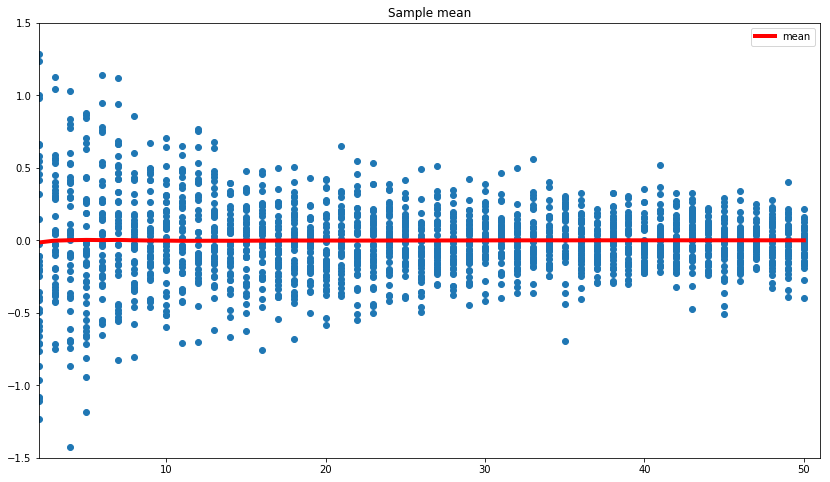

In [70]:
fig1=plt.figure(figsize=(14,8))
subplot=fig1.add_subplot(1,1,1)
subplot.set_title("Sample mean")
draw_subplot(subplot,raw_linex,raw_mu,mean_linex,mean_mu,(-1.5,1.5))
fig1.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


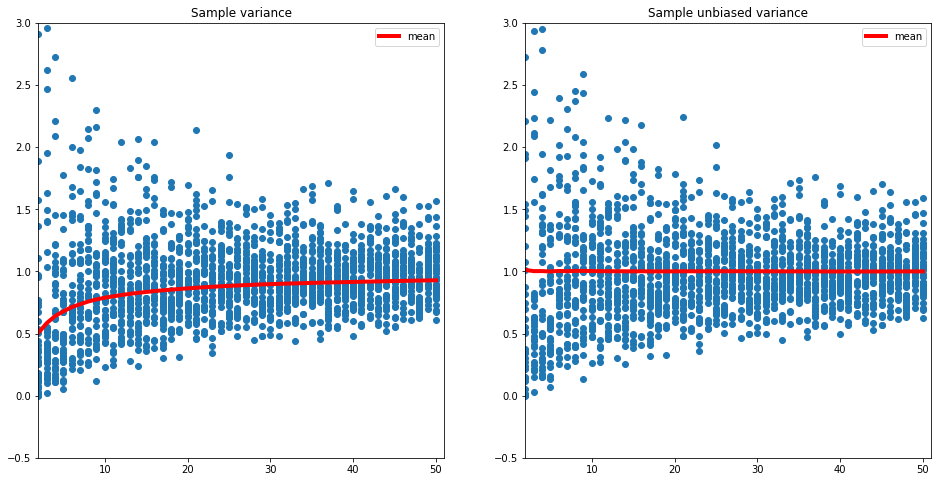

In [71]:
fig2=plt.figure(figsize=(16,8))
subplot1=fig2.add_subplot(1,2,1)
subplot1.set_title("Sample variance")
draw_subplot(subplot1,raw_linex,raw_s2,mean_linex,mean_s2,(-0.5,3.0))
subplot2=fig2.add_subplot(1,2,2)
subplot2.set_title("Sample unbiased variance")
draw_subplot(subplot2,raw_linex,raw_u2,mean_linex,mean_u2,(-0.5,3.0))
fig2.show()